# **East Africa drought study - exploratory analysis**

In [149]:
library(plyr) 

## **Trends in ENSO/GMST**

In [240]:
df <- merge(merge(merge(merge(merge(merge(read.fwf("/home/clair/wwa/90_data/gmst.dat", comment.char = "#", widths = c(5,15), col.names = c("year", "gmst")),
                                          read.csv("data/nino3.4rel_mam.csv", col.names = c("year", "nino_mam"))),
                                    read.csv("data/nino3.4rel_ond.csv", col.names = c("year", "nino_ond"))),
                              read.csv("ts/EA-drought_pr-mam_chirps05.dat", comment.char = "#", sep = " ", header = F, col.names = c("year", "mam"))),
                        read.csv("ts/EA-drought_pr-ond_chirps05.dat", comment.char = "#", sep = " ", header = F, col.names = c("year", "ond"))),
                  read.csv("ts/EA-drought_pr12_chirps05.dat", comment.char = "#", sep = " ", header = F, col.names = c("year", "pr12"))),
            read.csv("ts/EA-drought_pr24_chirps05.dat", comment.char = "#", sep = " ", header = F, col.names = c("year", "pr24")), all = T)
write.csv(df, "data/gmst-nino-rains.csv", row.names = F)

In [241]:
df <- read.csv("data/gmst-nino-rains.csv")

df["nino_ond_factor"] <- as.factor(c(1,0,2)[findInterval(df$nino_ond, c(-0.5,0.5))+1]) # 0 is neutral, 1 is La Nina, 2 is El Nino
df["nino_mam_factor"] <- as.factor(c(1,0,2)[findInterval(df$nino_ond, c(-0.5,0.5))+1])

df["nino_ond_bin"] <- findInterval(df$nino_ond, c(-0.5,0.5))-1 # 0 is neutral, -1 if La Nina, 1 if El Nino

In [243]:
# best fit is from treating Nino3.4 as a continuous coefficient
lm_ond_cts <- lm(ond ~ gmst + nino_ond, df)
lm_ond_disc <- lm(ond ~ gmst + I(nino_ond < -0.5) + I(nino_ond > 0.5), df) # identical results to using factorial definition
lm_ond_fac <- lm(ond ~ gmst + nino_ond_factor, df)
lm_ond_bin <- lm(ond ~ gmst + nino_ond_bin, df)
lm_ond_nogmst <- lm(ond ~ nino_ond, df)

In [244]:
rbind.fill(sapply(list(lm_ond_cts, lm_ond_disc, lm_ond_fac, lm_ond_bin, lm_ond_nogmst), function(mdl) {
    data.frame(t(matrix(c("rsq" = summary(mdl)$r.squared, "adj.rsq" = summary(mdl)$adj.r.squared, mdl$coefficients))))
}, simplify = F))

X1,X2,X3,X4,X5,X6
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.2970957,0.2610493,133.8361,91.53667,41.46163,NA
0.2179090,0.1561650,131.1351,86.30261,-38.87009,59.99385
0.2179090,0.1561650,131.1351,86.30261,-38.87009,59.99385
0.2150905,0.1748388,136.8762,89.12251,49.00473,NA
0.2402755,0.2212823,182.2470,38.36857,NA,NA


Warning message in abline(lm_ond_cts, col = "blue"):
“only using the first two of 3 regression coefficients”


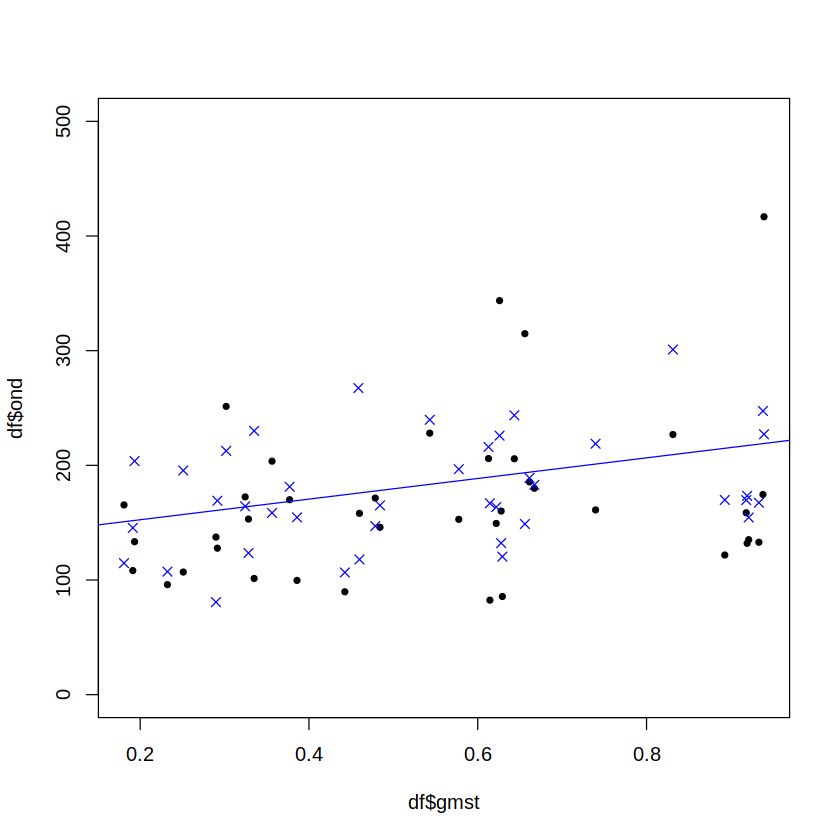

In [185]:
plot(df$gmst, df$ond, pch = 20, ylim = c(0,500))
abline(lm_ond_cts, col = "blue")
points(df$gmst, fitted(lm_ond_cts), pch = 4, col = "blue")

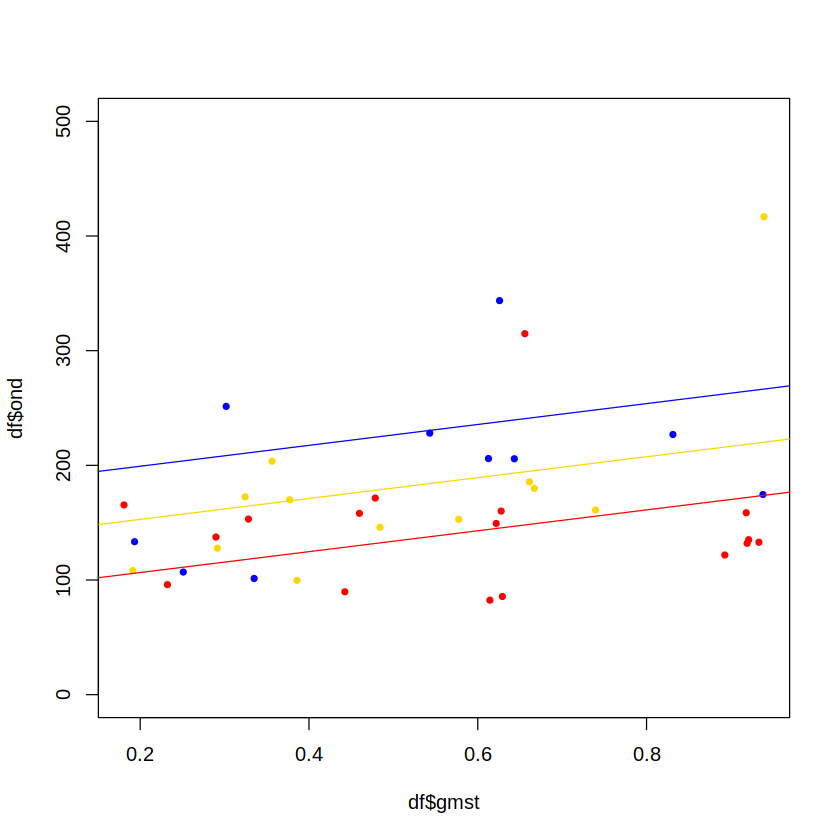

In [213]:
plot(df$gmst, df$ond, pch = 20, ylim = c(0,500), col = c("red", "gold", "blue")[df$nino_ond_bin+2])
abline(sum(lm_ond_bin$coefficients[c(1,3)]), lm_ond_bin$coefficients[2], col = "blue")
abline(lm_ond_bin$coefficients[1], lm_ond_bin$coefficients[2], col = "gold")
abline(diff(lm_ond_bin$coefficients[c(3,1)]), lm_ond_bin$coefficients[2], col = "red")

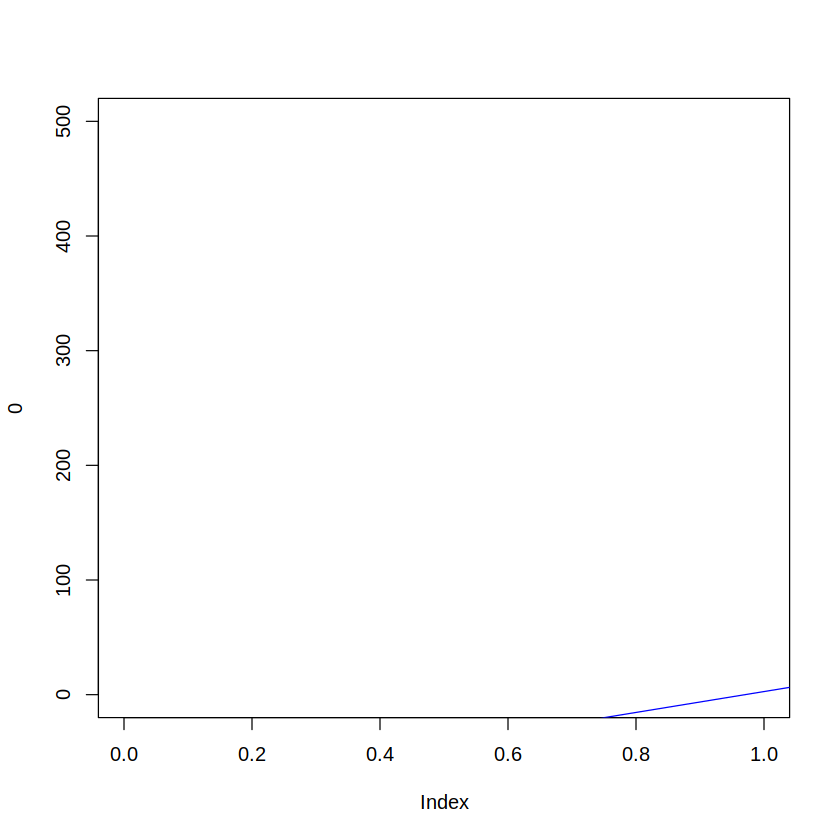

In [207]:
plot(0, type = "n", ylim = c(0,500), xlim = c(0,1))
abline(diff(lm_ond_bin$coefficients[c(1,3)]), lm_ond_bin$coefficients[2], col = "blue")

In [210]:
diff(lm_ond_bin$coefficients[c(3,1)])

(Intercept) 
   88.31881

In [202]:
lm_ond_bin$coefficients[2]

gmst 
91.04799

In [209]:
lm_ond_bin$coefficients[c(1,3)]

(Intercept) nino_ond_bin 
    134.6723      46.3535